In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/Users/tony/Desktop/Career Foundry/Achievement 6/Superstore_cleaned.csv", encoding='latin1')

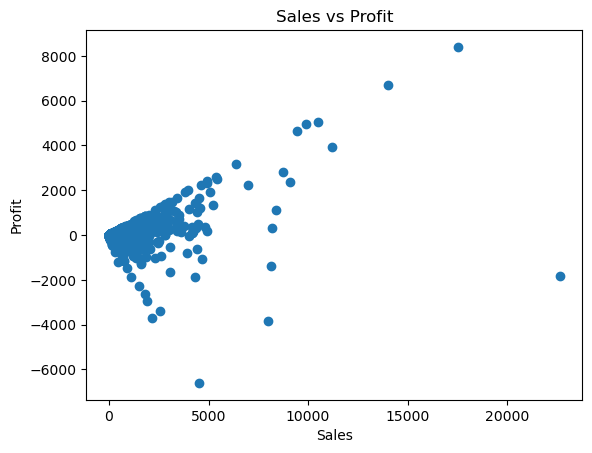

In [7]:
# Create a scatterplot for Sales vs. Profit
df.plot(x='Sales', y='Profit', style='o', legend=None)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

### Hypothesis
There is a positive correlation between Sales and Profit, meaning that as Sales increase, Profit tends to increase as well.


## Data Prep for Regression Analysis

In [12]:
# Reshape the variables into NumPy arrays
X = df['Sales'].values.reshape(-1, 1)  # Independent variable (Sales)
y = df['Profit'].values.reshape(-1, 1) # Dependent variable (Profit)

In [15]:
x

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [16]:
y

array([[ 41.9136],
       [219.582 ],
       [  6.8714],
       ...,
       [ 19.3932],
       [ 13.32  ],
       [ 72.948 ]])

In [17]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Display the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6995, 1)
X_test shape: (2999, 1)
y_train shape: (6995, 1)
y_test shape: (2999, 1)


## Regression Analysis

In [19]:
# Create the linear regression model
regression = LinearRegression()

# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using the test set
y_predicted = regression.predict(X_test)

# Display the first few predicted values
print("Predicted values for y:", y_predicted[:5])


Predicted values for y: [[-1.75662971]
 [-1.85432563]
 [-0.1030566 ]
 [34.60858053]
 [-2.25013364]]


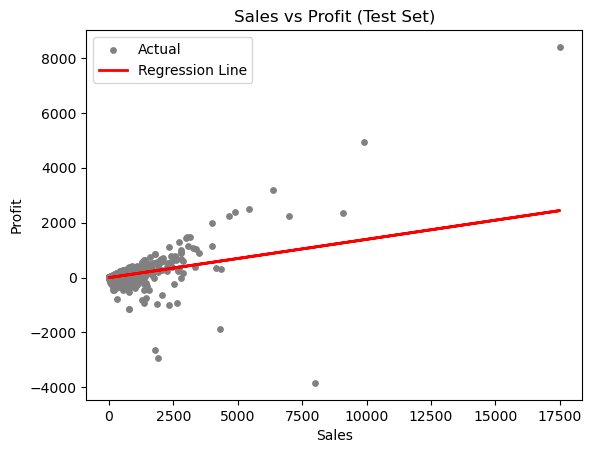

In [32]:
# Create a scatter plot of the test data
plt.scatter(X_test, y_test, color='gray', s=15, label='Actual')

# Plot the regression line based on the predictions
plt.plot(X_test, y_predicted, color='red', linewidth=2, label='Regression Line')

# Add titles and labels
plt.title('Sales vs Profit (Test Set)')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Show legend
plt.legend()

# Display the plot
plt.show()

The regression line on the test set provides a general trend that suggests a positive relationship between Sales and Profit; as Sales increase, Profit also tends to increase. However, the fit of the line to the data points is not very strong, as evidenced by the significant spread of the actual data points around the regression line.
In summary, while there is a positive relationship between Sales and Profit, the scatterplot indicates that the linear regression model might not be the best fit for the data. This could imply that the relationship between Sales and Profit is more complex, potentially requiring a more sophisticated model or the inclusion of additional variables to improve the accuracy of the predictions.

In [22]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_predicted)

# Display the results
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) score:', r2)


Mean Squared Error (MSE): 51349.125157537055
R-squared (R2) score: 0.3077658276679899


In [23]:
# Create a dataframe to compare the actual y values with the predicted y values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

# Display the first few rows of the dataframe to compare the values
comparison_df.head(30)

,Actual,Predicted
0,11.6800,-1.756630
1,9.7438,-1.854326
2,2.6406,-0.103057
3,17.7450,34.608581
4,6.4428,-2.250134
5,12.9740,0.554576
6,25.6800,4.540570
7,286.3836,217.034764
8,-52.8908,16.807380
9,909.9818,483.452915


### Reflections on Possible Data Bias

The performance of the model might be influenced by several factors, including:

Data Distribution: If the dataset is not well-balanced (e.g., having more data points with low sales/profit and fewer with high sales/profit), the model may be biased towards predicting values that are closer to the majority class.

Outliers: Extreme values in sales or profit might skew the model's predictions, leading to less accurate results for typical data points.

Feature Relationships: The model assumes a linear relationship between sales and profit, which might not hold true if other underlying factors affect profit (e.g., discounts, operating costs, market conditions). This simplification can lead to biased or inaccurate predictions.


Overall, while the model captures some aspects of the relationship between sales and profit, its performance suggests that the relationship might be more complex than a simple linear regression can capture. Further exploration with more sophisticated models or additional features might be necessary to improve predictive accuracy.

## Bonus: performance improvement after removing outliers

In [24]:
# Calculate the IQR for Profit
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

# Display the new shape of the dataset without outliers
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)


Original dataset shape: (9994, 19)
Dataset shape after removing outliers: (8113, 19)


In [25]:
# Reshape the variables into NumPy arrays
X_no_outliers = df_no_outliers['Sales'].values.reshape(-1, 1)
y_no_outliers = df_no_outliers['Profit'].values.reshape(-1, 1)


In [26]:
# Split the data into a training set and a test set
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=0)


In [27]:
# Create the linear regression model
regression_no_outliers = LinearRegression()

# Fit the model to the training data
regression_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predict the values of y using the test set
y_predicted_no_outliers = regression_no_outliers.predict(X_test_no_outliers)


In [28]:
# Calculate the Mean Squared Error (MSE)
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_predicted_no_outliers)

# Calculate the R-squared (R2) score
r2_no_outliers = r2_score(y_test_no_outliers, y_predicted_no_outliers)

# Display the results
print('Mean Squared Error (MSE) without outliers:', mse_no_outliers)
print('R-squared (R2) score without outliers:', r2_no_outliers)


Mean Squared Error (MSE) without outliers: 321.3348998153415
R-squared (R2) score without outliers: 0.07816575798353464


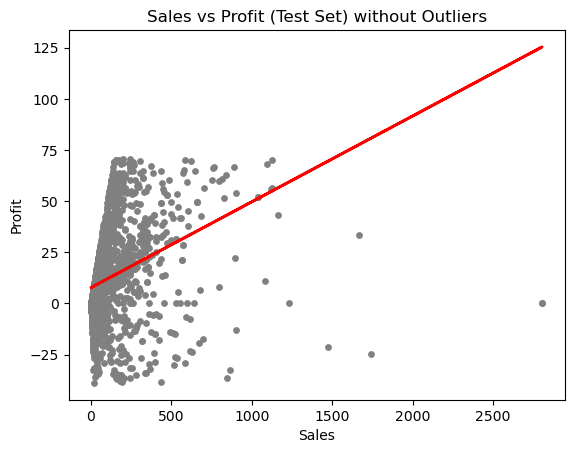

In [31]:
import matplotlib.pyplot as plt

# Create a scatter plot of the test data without outliers
plt.scatter(X_test_no_outliers, y_test_no_outliers, color='gray', s=15, label='Actual')

# Plot the regression line based on the predictions
plt.plot(X_test_no_outliers, y_predicted_no_outliers, color='red', linewidth=2, label='Regression Line')

# Add titles and labels
plt.title('Sales vs Profit (Test Set) without Outliers')
plt.xlabel('Sales')
plt.ylabel('Profit')


# Display the plot
plt.show()


In [33]:
# Create a dataframe to compare the actual y values with the predicted y values after removing outliers
comparison_df_no_outliers = pd.DataFrame({'Actual': y_test_no_outliers.flatten(), 'Predicted': y_predicted_no_outliers.flatten()})

# Display the first few rows of the dataframe to compare the values
comparison_df_no_outliers.head(10)

,Actual,Predicted
0,-0.9900,7.824844
1,0.6312,8.436735
2,3.9852,8.270176
3,3.9102,8.109655
4,22.2980,15.255269
5,-33.1390,8.671562
6,35.0400,10.713717
7,3.4048,8.590882
8,9.4700,8.569245
9,32.1300,14.115352


### Thoughts on Model Performance After Removing Outliers

After removing outliers, the model's performance on the test set seems to have changed significantly. The predicted values are now more concentrated around a certain range, and the overall variance in predictions is much lower than in the original model with outliers.

Key observations:

Narrowed Predictions: The predicted Profit values are much closer to each other, indicating that the model has lost some of its ability to predict extreme profit values. This is likely because those extreme values were removed during the outlier filtering process.

Reduced Range: The maximum predicted Profit is much lower than before, and the predictions are more centered around a middle range. This suggests that the model may now be less capable of handling the diversity of the original dataset, particularly those transactions that resulted in very high or very low profits.